## Observations and Insights 

Pymaceuticals Observations and Results

Upon cleaning the data by removing the duplicated mouse with the same timepoint, the data is presented with all the mice test subjects which has been given different drug regimen in order identify the effectiveness of the drugs against the tumor. 

<img src="images/mice_treatment.png" />
Capomulin and Ramicane are the top 2 drugs with the most test subjects, with over 200 tests. 

<img src="images/mice_genderdist.png" />
According to the Gender pie chart, the mice gender are not skewed to one gender, hence there is no gender bias in the test results.

<img src="images/mice_capomulin.png" />
Looking at the box plot, Capomulin and Ramicane are more effective agaisnt tumor due to the closeness to the median. Whereas there is an outlier for Infubinol and Ceftamin may not be as effective due to the lower and higher quartile are close to the extremes.  

<img src="images/miceweight_avgtum.png" />
The correlation coefficient of mouse weight vs. average tumor volume is 0.84. Since it is close to 1, we can conclude that the variables are positively linearly related.


In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = mouse_results.nunique()['Mouse ID']

print(f'There are a total of {total_mice} mice.')


There are a total of 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results['Duplicated'] = mouse_results.duplicated(subset=['Mouse ID','Timepoint'])

duplicated_mice = mouse_results[mouse_results['Duplicated']==True] 
duplicated_mice[['Mouse ID','Timepoint']] #showing only the duplicated mice by their ID and Timepoint



,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mouse_results[mouse_results['Mouse ID'].isin(duplicated_mice)==False] #dropping the duplicates
cleaned_mice.reset_index(drop= True, inplace=True) #reset the index without having the index in the column

cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_total = len(cleaned_mice['Mouse ID'].unique())

print(f'After cleaning the data, the total of mice is {cleaned_total}.')

After cleaning the data, the total of mice is 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_var = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_sd = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
trail_count = cleaned_mice.groupby(['Drug Regimen'])['Mouse ID'].count()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats_df = pd.DataFrame({'Trail Count': trail_count, 'Tumor Mean': tumor_mean, 'Tumor Median': tumor_median,'Tumor Variance': tumor_var, 
                               'Tumor Std Dev': tumor_sd, 'SEM of Tumor': tumor_sem})

tumor_stats_df

,Trail Count,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,SEM of Tumor
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# cleaned_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe(include='all')
# this only shows count, mean, std, min, 25, 50, 75 and Max, no Variance and SEM

# This method produces everything in a single groupby function
another_method = cleaned_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['count','mean','median','var','std','sem']})
another_method

Tumor Volume (mm3)                                             \
                          count       mean     median        var       std   
Drug Regimen                                                                 
Capomulin                   230  40.675741  41.557809  24.947764  4.994774   
Ceftamin                    178  52.591172  51.776157  39.290177  6.268188   
Infubinol                   178  52.884795  51.820584  43.128684  6.567243   
Ketapril                    188  55.235638  53.698743  68.553577  8.279709   
Naftisol                    186  54.331565  52.509285  66.173479  8.134708   
Placebo                     181  54.033581  52.288934  61.168083  7.821003   
Propriva                    161  52.322552  50.854632  42.351070  6.507770   
Ramicane                    228  40.216745  40.673236  23.486704  4.846308   
Stelasyn                    181  54.233149  52.431737  59.450562  7.710419   
Zoniferol                   182  53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of Mice for each treatment'}, xlabel='Drug Regimen', ylabel='Trail Count'>

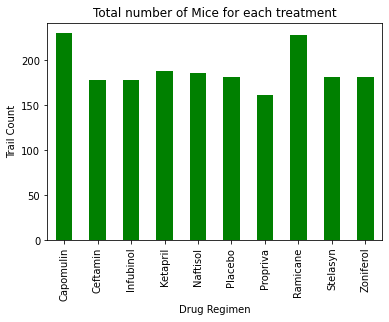

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment = tumor_stats_df[['Trail Count']]
mice_treatment.plot(kind='bar', title='Total number of Mice for each treatment', 
                    color='green',width=0.5, ylabel="Trail Count",legend=False )


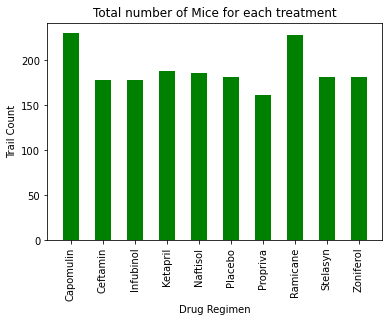

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

type_of_drugs = tumor_stats_df.index
trial_count = tumor_stats_df['Trail Count']
plt.title('Total number of Mice for each treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Trail Count')
plt.bar(type_of_drugs, trail_count, color='green', width=0.5)
tick_locations = [value for value in type_of_drugs]
plt.xticks(tick_locations, rotation= 90)
plt.savefig("images/mice_treatment.png")
plt.show()


<AxesSubplot:title={'center':'Gender Distribution'}>

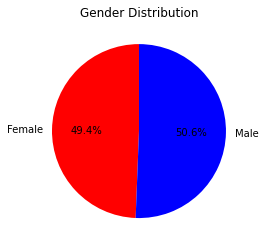

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gend = cleaned_mice.groupby(['Sex'])['Mouse ID'].count()
mice_gend.plot(kind='pie',colors=['red','blue'], startangle=90, autopct = "%.1f%%", ylabel='', title='Gender Distribution')


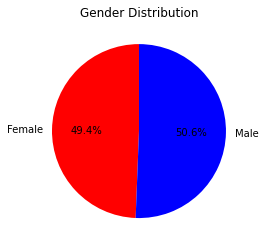

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = cleaned_mice.groupby(['Sex'])['Mouse ID'].count()
labels = ['Female', 'Male']
colors = ['red','blue']

plt.pie(mice_gender, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=False, startangle=90)
plt.title('Gender Distribution')
plt.savefig("images/mice_genderdist.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(cleaned_mice.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint': 'Last Timepoint'})

last_timepoint.reset_index(inplace=True)

# print(last_timepoint) # to test output

merged_results = pd.merge(cleaned_mice, last_timepoint, on='Mouse ID')
merged_results.pop('Duplicated') #for a cleaner look as Column Duplicated no longer required
merged_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
treatments = []

i = 0 #use this to as a row counter

for drug in four_drugs:
    temporary = merged_results.loc[merged_results['Drug Regimen'] == drug]
    final_results = temporary.loc[temporary['Timepoint'] == temporary['Last Timepoint']] # to get rows with only the Last Timepoint
    # Create a series that consists of all final volume values for each regimen
    values = final_results['Tumor Volume (mm3)']
    treatments.append(values)
    quartiles = values.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    print(f'The lower quartile for {drug} is: {lowerq}')
    
    upperq = quartiles[0.75]
    print(f'The upper quartile for {drug} is: {upperq}')
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = upperq-lowerq
    print(f'The interquartile range for {drug} is: {iqr}')
    print(f'The the median result for {drug} is: {quartiles[0.5]} ')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {lower_bound} for {drug} could be outliers.')
    print(f'Values above {upper_bound} for {drug} could be outliers.')
   
    print(f'---------------------------------------------')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
outlier_mice = merged_results.loc[(merged_results['Tumor Volume (mm3)'] < lower_bound) | (merged_results['Tumor Volume (mm3)'] > upper_bound)]
print(f'\n')
print(f'These are the Outlier Mice')
outlier_mice
    

    

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The the median result for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
---------------------------------------------
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The the median result for Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
---------------------------------------------
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The the median result for Infubinol is: 60.16518046 
Values below 36.8329049499999

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45


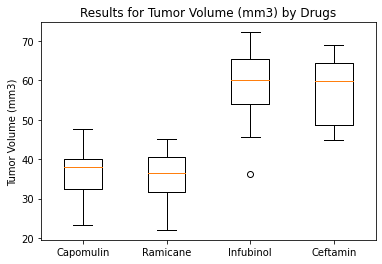

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot boxplot
plt.boxplot(treatments)

# Add title and labels to boxplot
plt.title('Results for Tumor Volume (mm3) by Drugs')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.savefig("images/mice_4drugs.png")
plt.show()

## Line and Scatter Plots

The following are the mice treated with Capomulin: 
 ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
Please enter Mouse ID to view treatment data:f966


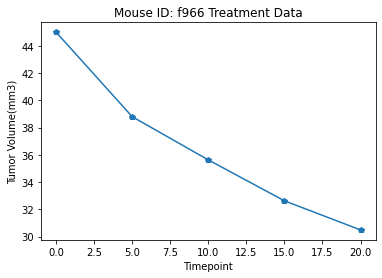

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = merged_results[merged_results['Drug Regimen'] =='Capomulin']
capo_mouse = capomulin['Mouse ID']
print(f'The following are the mice treated with Capomulin: \n {capo_mouse.unique()}') 
#Displays the list of Mouse ID treated with Capomulin 

mouseinput= input('Please enter Mouse ID to view treatment data:') #get user input

mouseoutput = capomulin[capomulin['Mouse ID'] == mouseinput]
mouse_time = mouseoutput['Timepoint']
mouse_tumvol = mouseoutput['Tumor Volume (mm3)']

plt.title(f'Mouse ID: {mouseinput} Treatment Data')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume(mm3)')
plt.plot(mouse_time, mouse_tumvol, marker = 'p')
plt.savefig("images/mice_capomulin.png")


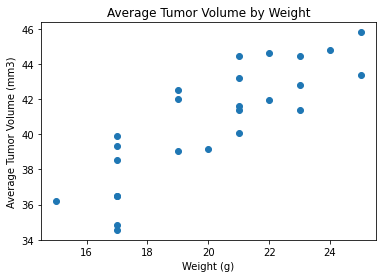

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

avg_tumvol = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()) #getting average tumor volume
mouse_weight = capomulin[['Mouse ID','Weight (g)']].drop_duplicates()
avg_tumvol = pd.merge(avg_tumvol, mouse_weight, on='Mouse ID') #merging into one with weight corresponding to average tumor volume

x_axis = avg_tumvol['Weight (g)']
y_axis = avg_tumvol['Tumor Volume (mm3)']

# Create the scatter plot 
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

plt.show()



## Correlation and Regression

The correlation between both factors is 0.84


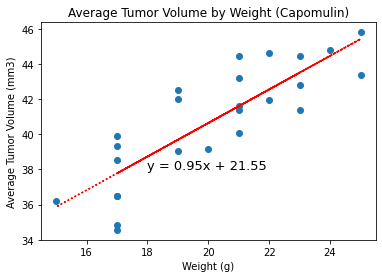

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = sts.pearsonr(x_axis,y_axis)
print(f'The correlation between both factors is {round(correlation[0],2)}')

mt_slope, mt_int, mt_r, mt_p, mt_std_err = sts.linregress(x_axis, y_axis)
mt_fit = mt_slope * x_axis + mt_int
line_equation = f'y = {str(round(mt_slope,2))}x + {str(round(mt_int,2))}'


plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight (Capomulin)')
plt.annotate(line_equation,(18,38),fontsize=13,color='black')
plt.plot(x_axis,mt_fit,':r')
plt.savefig("images/miceweight_avgtum.png")